#### Multi Class Classfication Modelling using Logistic Regression, Naive Bayes models

##### Dataset is from Kaggle - https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

This dataset is synthetically generated to mimic weather data for classification tasks. It includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. This dataset is designed for practicing classification algorithms, data preprocessing, and outlier detection methods.

In [62]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit, MNLogit

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from statsmodels.discrete.discrete_model import Logit
from seaborn import heatmap

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

import warnings 
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv('.\\archive\weather_classification_data.csv')

In [6]:
df.head(20)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [7]:
df.shape

(13200, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [9]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [10]:
#Numerical Columns
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

In [11]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [12]:
cat_cols =list(df.columns[~df.columns.isin(num_cols)])

In [13]:
#set background color for all sns plots, silver black
sns.set_theme(style="darkgrid")

In [14]:
color_list = [
    '#aec7e8',  # Light Blue
    '#ffbb78',  # Light Orange
    '#98df8a',  # Light Green
    '#ff9896',  # Light Red
    '#c5b0d5',  # Light Purple
    '#c49c94',  # Light Brown
    '#f7b6d2',  # Light Pink
    '#c7c7c7',  # Light Gray
    '#dbdb8d',  # Light Olive
    '#9edae5'   # Light Teal
]

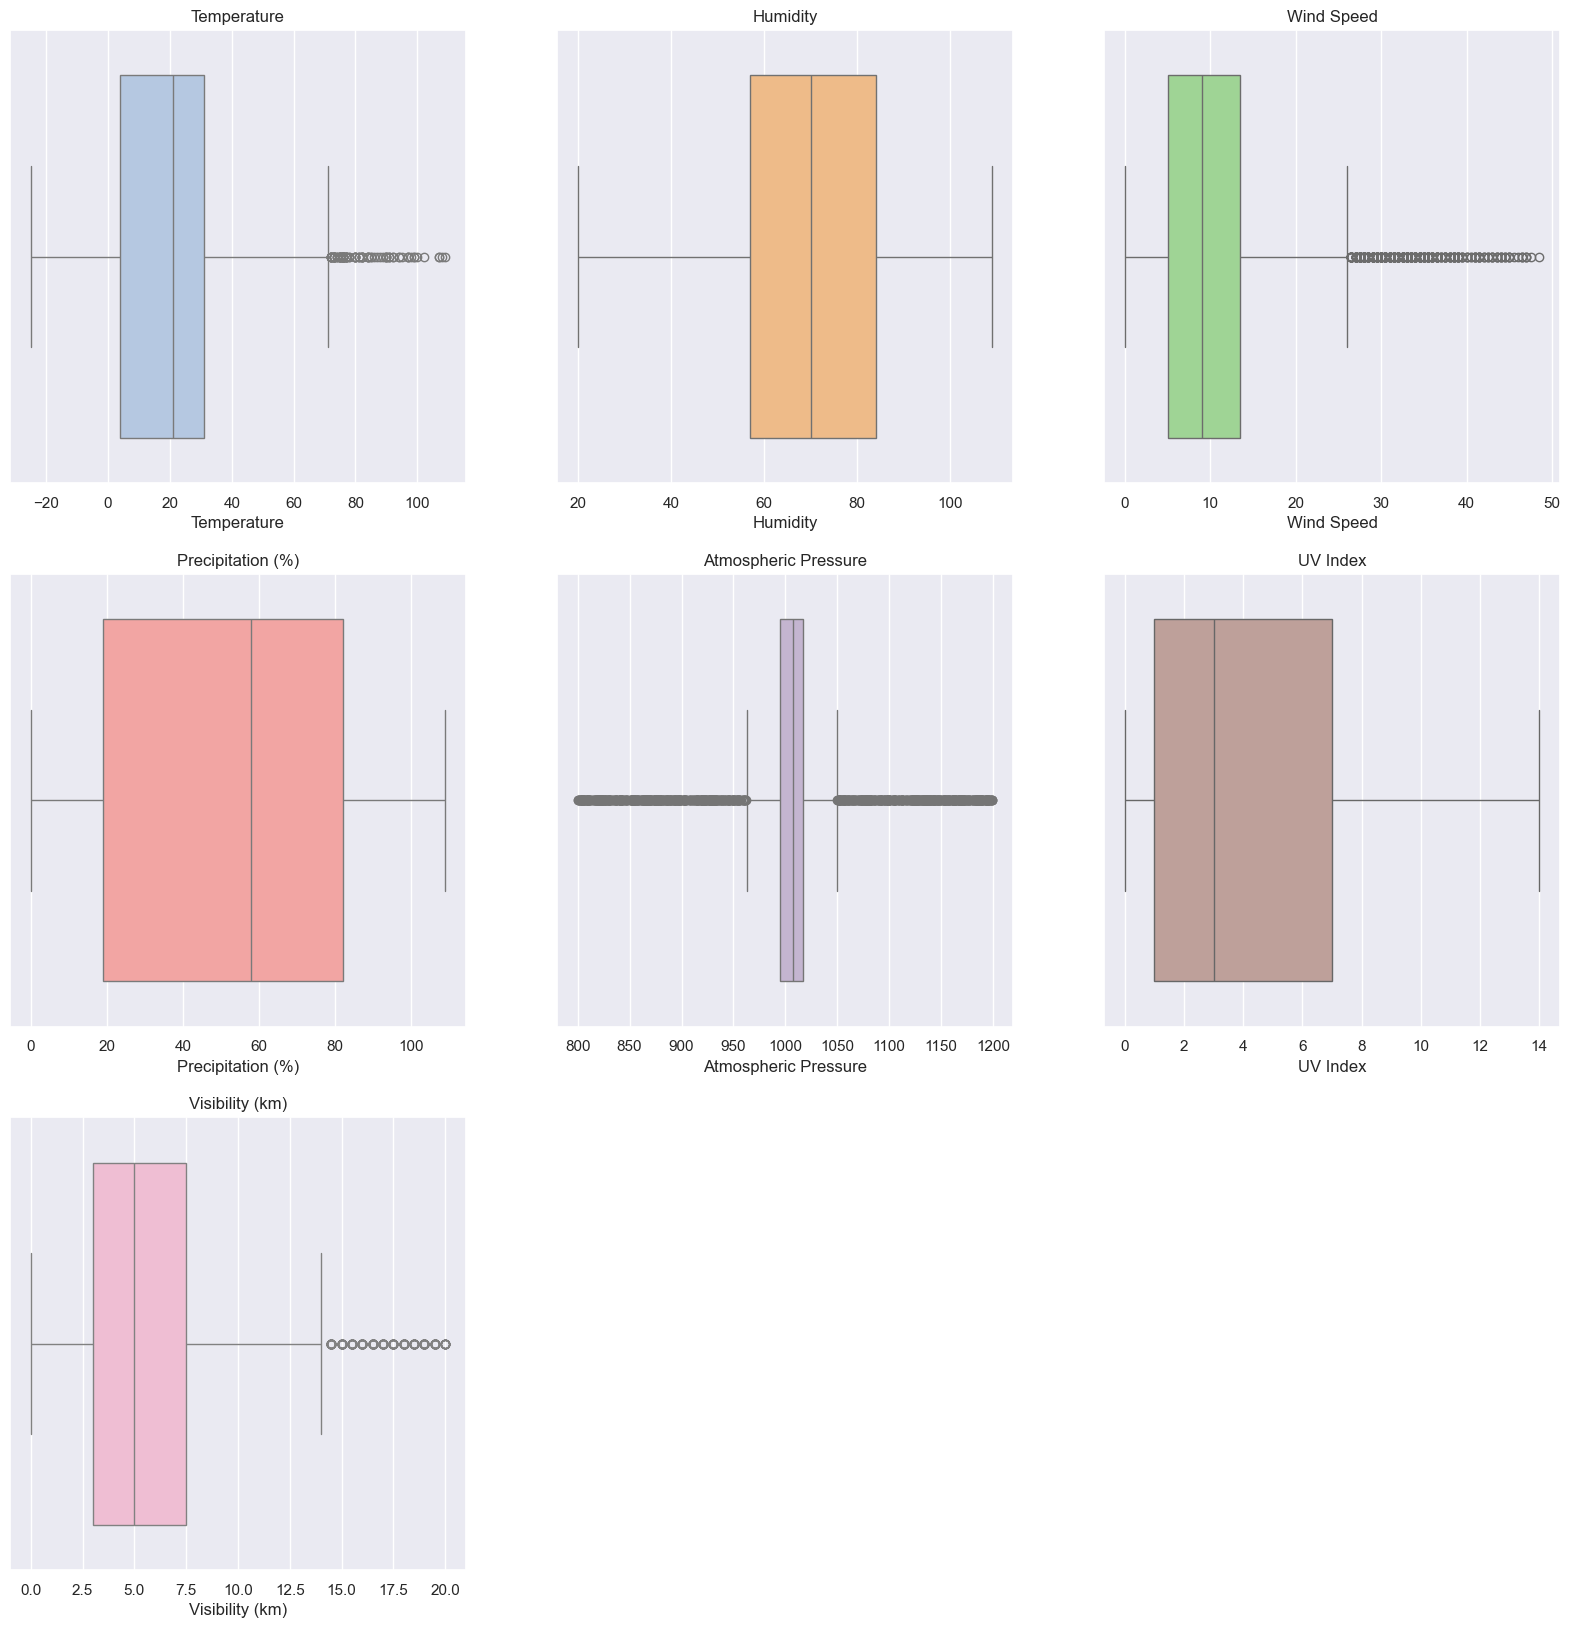

In [15]:
# Univariate Analysis of all numerical columns Boxplot using sns. Use subplots to plot all columns in a single plot

#color_list = ['r','g','b','y','m','c','k','w','orange','purple']

plt.figure(figsize=(20,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col], color=color_list[i-1])
    plt.title(col)

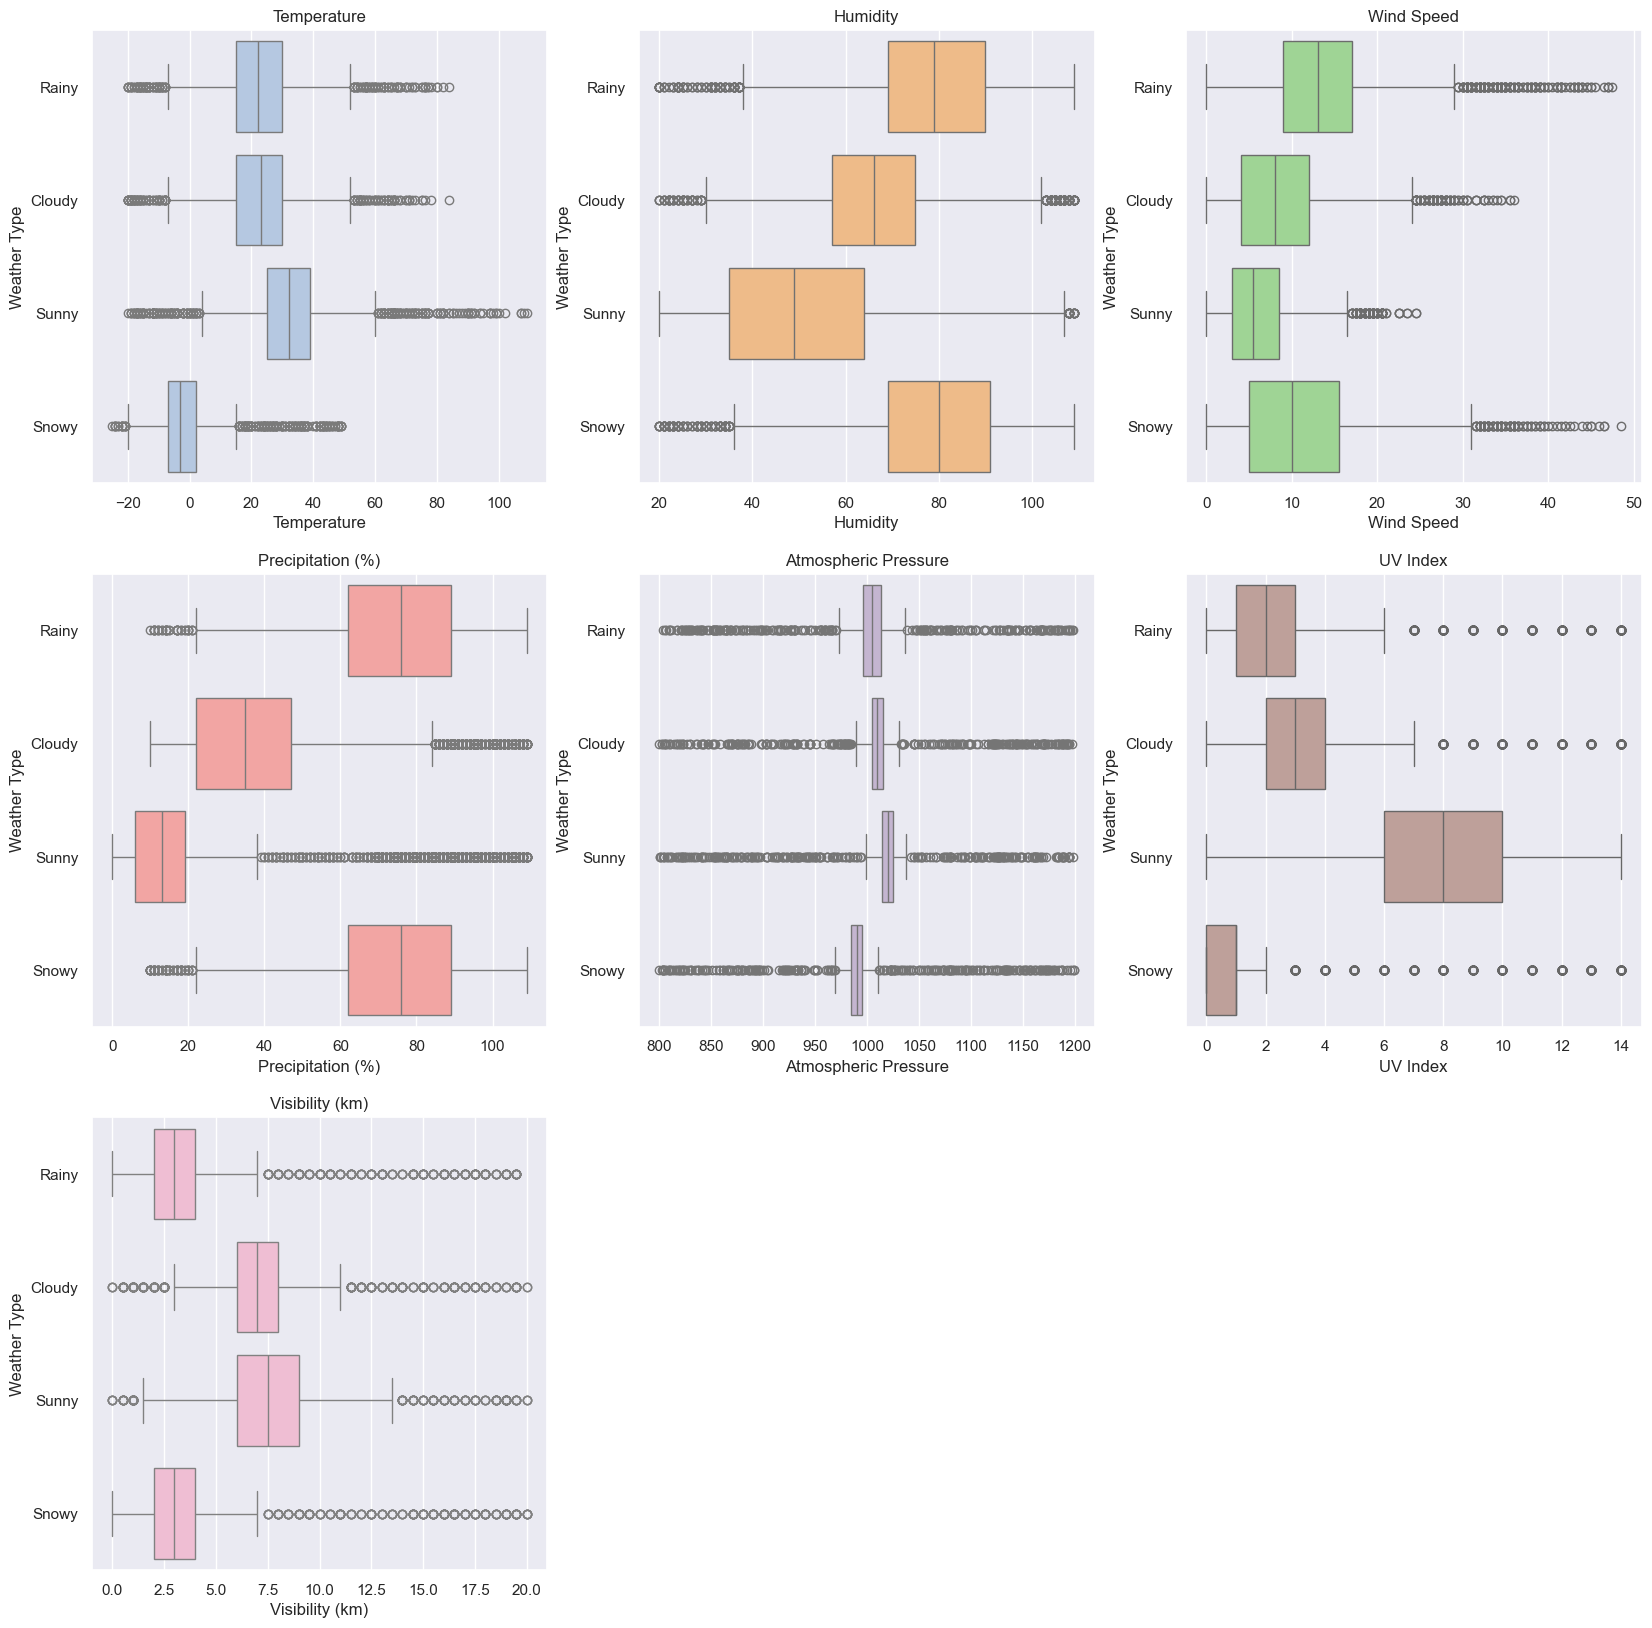

In [16]:
# bi-variate analysis of numerical columns with respect to target column using sns.boxplot(). Use subplots to plot all columns in a single plot
#target column is Weather Type

plt.figure(figsize=(20,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(y= df['Weather Type'],x= df[col], color=color_list[i-1])
    plt.title(col)

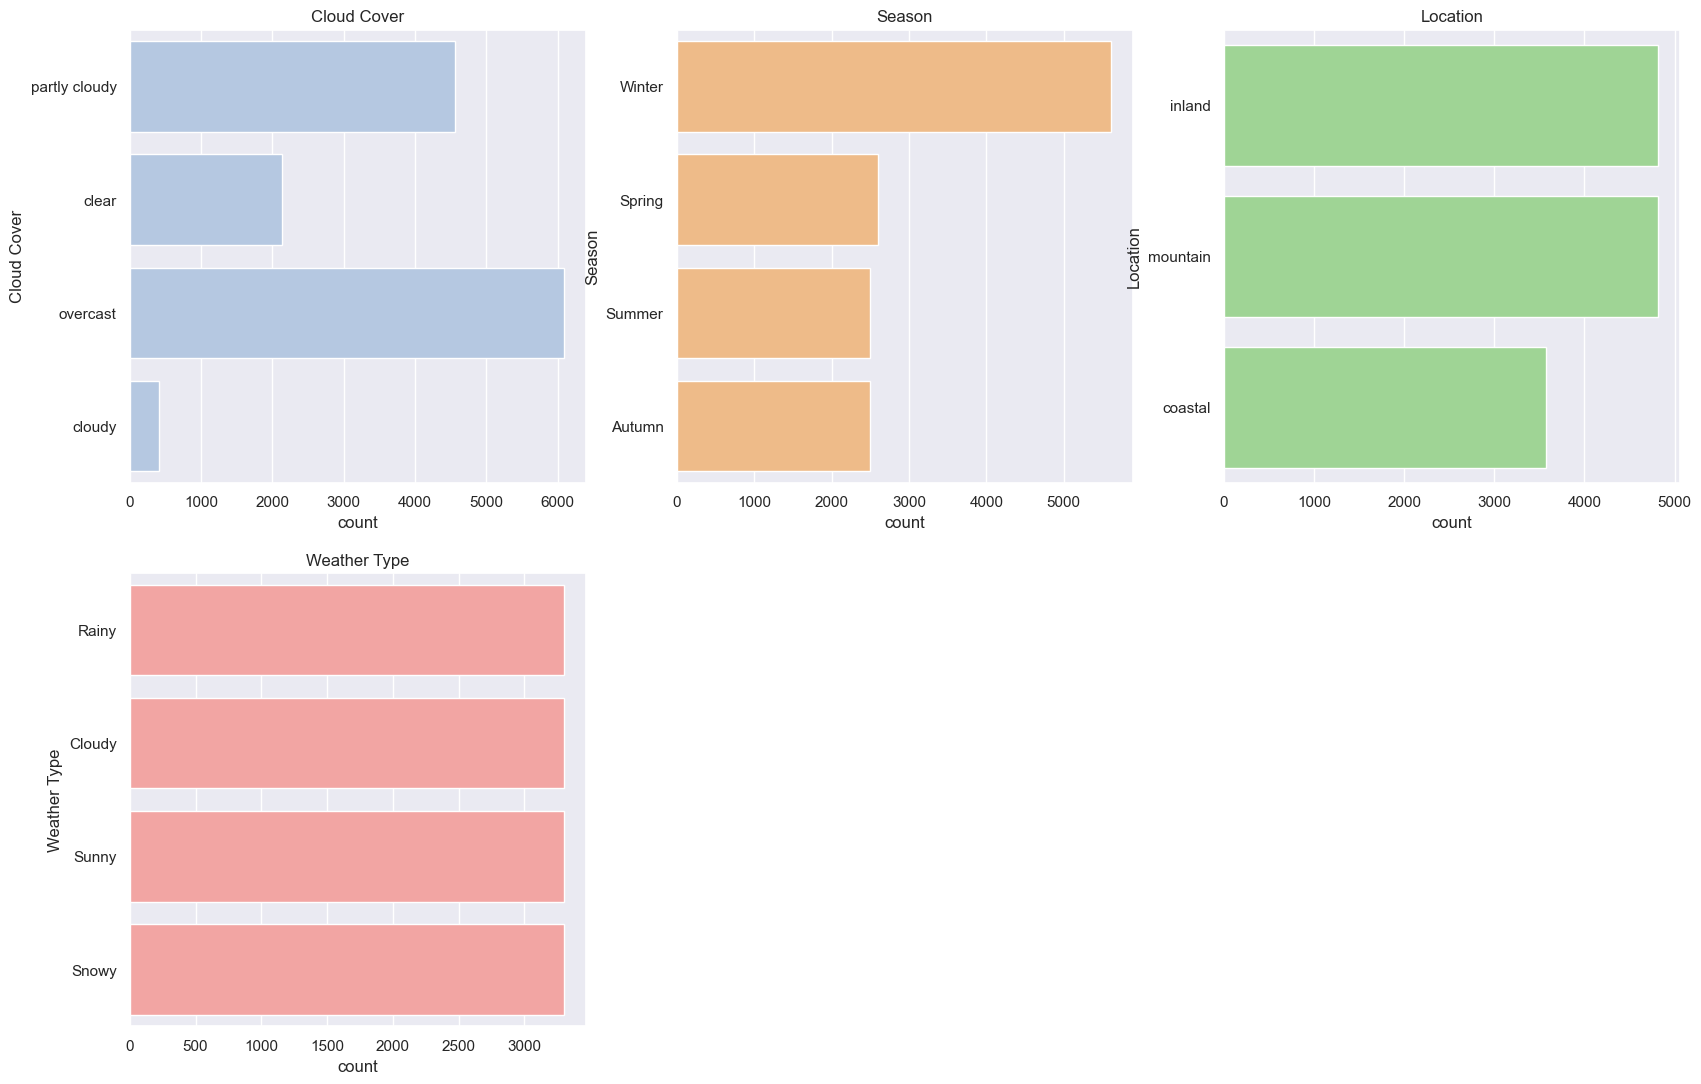

In [17]:
# Univariate Analysis of all categorical columns using sns.countplot(). Use subplots to plot all columns in a single plot
plt.figure(figsize=(20,20))
for i,col in enumerate(cat_cols,1):
    plt.subplot(3,3,i)
    sns.countplot(df[col], color=color_list[i-1])
    plt.title(col)

<Axes: >

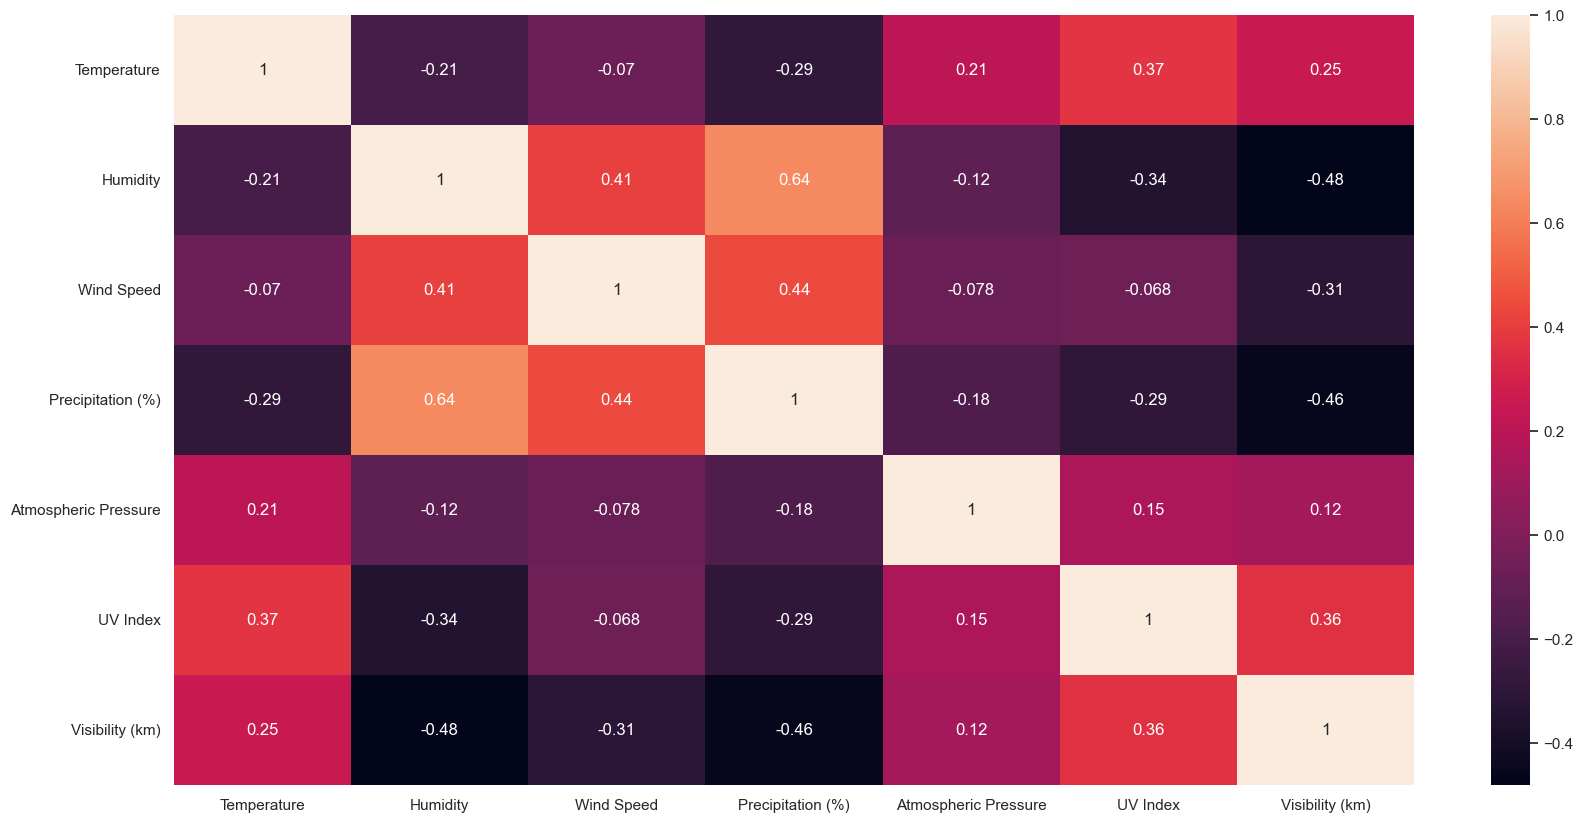

In [18]:
# heatmap of correlation matrix of numerical columns and categorical columns
plt.figure(figsize=(20,10))
heatmap(df[num_cols].corr(),annot=True)


In [19]:
# correlation table of numerical columns and categorical columns

df[num_cols].corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Temperature,1.000000,-0.207969,-0.070022,-0.287206,0.209188,0.374773,0.250751
Humidity,-0.207969,1.000000,0.406079,0.638631,-0.120653,-0.342694,-0.479969
Wind Speed,-0.070022,0.406079,1.000000,0.443770,-0.077757,-0.068147,-0.311828
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,-0.177444,-0.291601,-0.457444
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,1.000000,0.154128,0.120182
UV Index,0.374773,-0.342694,-0.068147,-0.291601,0.154128,1.000000,0.362922
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,0.120182,0.362922,1.000000


In [20]:
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

In [21]:
# Encoding the categorical columns
cat_cols = X.select_dtypes(include='object').columns

In [22]:
#one hot encoding with 1 and 0 for categorical columns

X = pd.get_dummies(X, columns=cat_cols)


In [23]:
# convert all true and false to 1 and 0

X = X.map(lambda x: 1 if x == True else 0 if x == False else x)

In [24]:
X

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,0,0,0,1,0,0,0,1,0,1,0
1,39.0,96,8.5,71.0,1011.43,7,10.0,0,0,0,1,0,1,0,0,0,1,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,1,0,0,0,0,1,0,0,0,0,1
3,38.0,83,1.5,82.0,1026.25,7,1.0,1,0,0,0,0,1,0,0,1,0,0
4,27.0,74,17.0,66.0,990.67,1,2.5,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,0,0,1,0,0,0,1,0,0,0,1
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,0,1,0,0,0,0,0,1,1,0,0
13197,30.0,77,5.5,28.0,1012.69,3,9.0,0,0,1,0,1,0,0,0,1,0,0
13198,3.0,76,10.0,94.0,984.27,0,2.0,0,0,1,0,0,0,0,1,0,1,0


In [25]:
''' Label Encoding for target column. 
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
    Encode target labels with value between 0 and n_classes-1.
    This transformer should be used to encode target values, i.e. y, and not the input X.
'''
le = LabelEncoder()
y  = le.fit_transform(y)
print(y)


[1 0 3 ... 0 2 1]


In [26]:
# Using train_test_split function to split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(9240, 18) (3960, 18) (9240,) (3960,)


In [27]:
 # Scale the data using MinMaxScaler



scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
# convert the data into dataframe   

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [29]:
X_train.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,0.522727,0.067416,0.084211,0.055046,0.555547,0.785714,0.275,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.431818,0.640449,0.357895,0.779817,0.539952,0.214286,0.075,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.196970,0.662921,0.157895,0.807339,0.490686,0.000000,0.150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.280303,0.528090,0.063158,0.431193,0.520196,0.142857,0.375,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.265152,0.516854,0.178947,0.247706,0.514579,0.285714,0.275,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
le.classes_

array(['Cloudy', 'Rainy', 'Snowy', 'Sunny'], dtype=object)

In [31]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.
 |  
 |     >>> list(zip('abcdefg', range(3), range(4)))
 |     [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]
 |  
 |  The zip object yields n-length tuples, where n is the number of iterables
 |  passed as positional arguments to zip().  The i-th element in every tuple
 |  comes from the i-th iterable argument to zip().  This continues until the
 |  shortest argument is exhausted.
 |  
 |  If strict is true and one of the arguments is exhausted before the others,
 |  raise a ValueError.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  

In [32]:
# print label encoding classes along with the encoded values

for i in zip(le.classes_, le.transform(le.classes_)):
    print(i)

('Cloudy', 0)
('Rainy', 1)
('Snowy', 2)
('Sunny', 3)


##### 'Cloudy': 0  'Rainy' : 1 'Snowy' : 2  'Sunny' : 3

In [33]:
# create y_test_inv by inverse transforming y_test

y_test_inv = le.inverse_transform(y_test)

In [34]:
X_test.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,0.196970,0.584270,0.326316,0.761468,0.461878,0.071429,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.136364,0.876404,0.231579,0.660550,0.493795,0.285714,0.250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.340909,0.224719,0.010526,0.165138,0.573173,0.642857,0.350,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.060606,0.438202,0.252632,0.522936,0.488931,0.928571,0.250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.303030,0.561798,0.273684,0.366972,0.505328,0.214286,0.400,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
X.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
       'Cloud Cover_clear', 'Cloud Cover_cloudy', 'Cloud Cover_overcast',
       'Cloud Cover_partly cloudy', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Location_coastal', 'Location_inland',
       'Location_mountain'],
      dtype='object')

<Axes: >

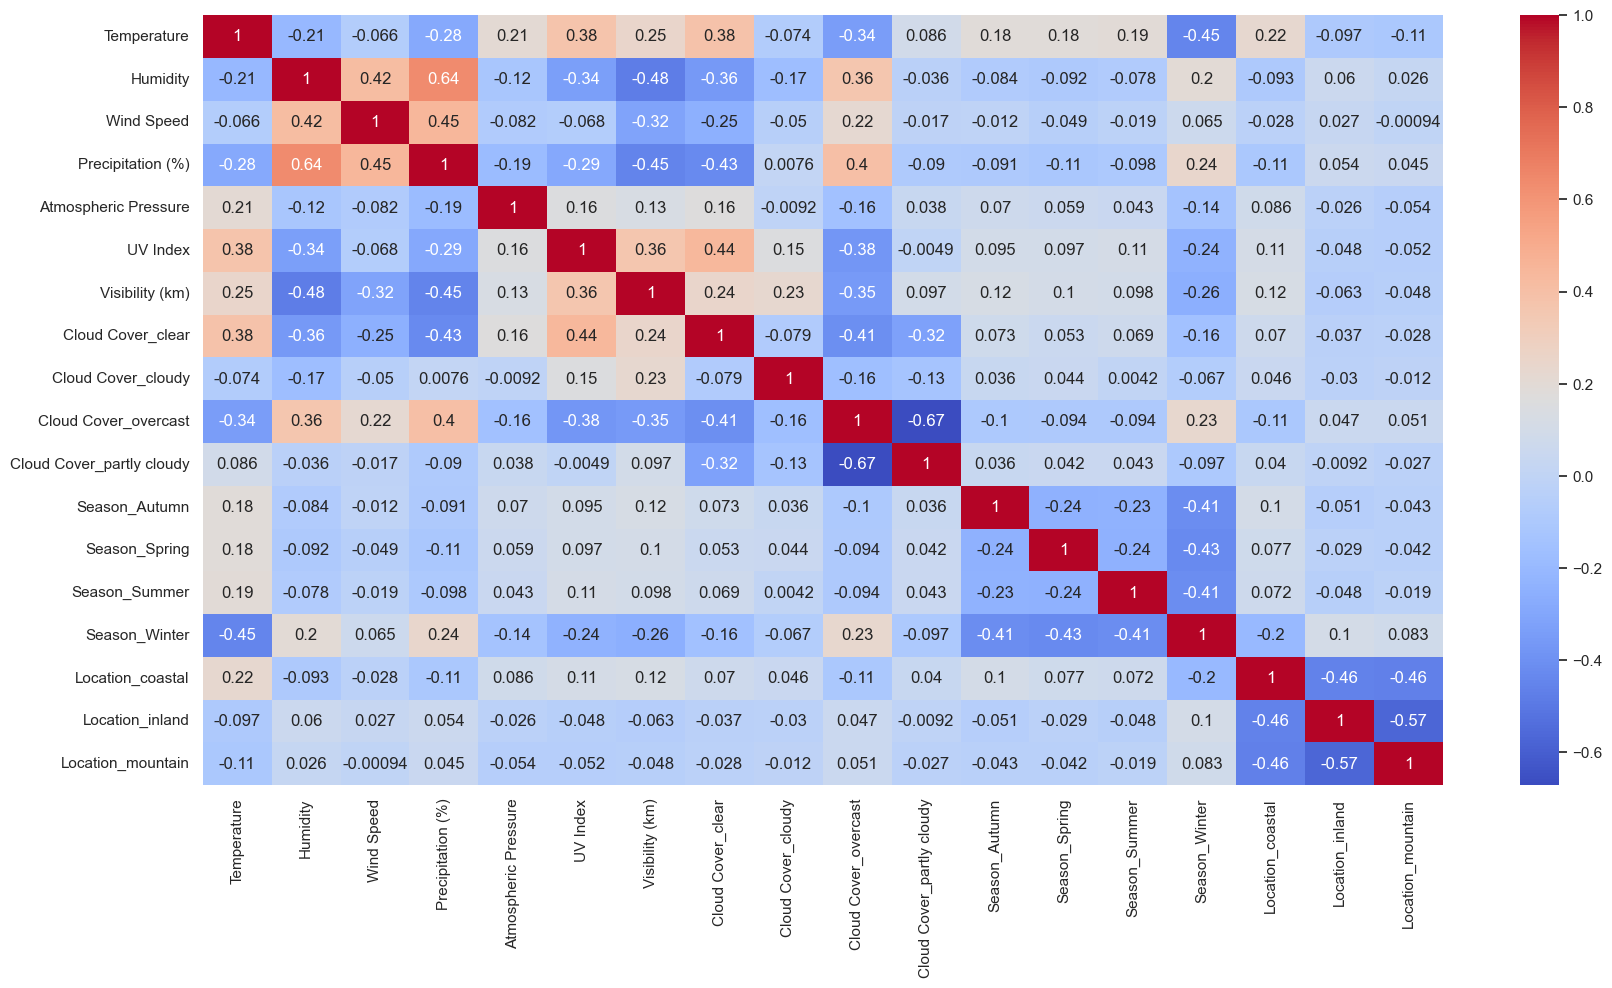

In [36]:
# find correlation between the columns of X_train

plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')

In [37]:
# precipitation and humidity are highly correlated
# drop humidity column
# Cloud Cover_partly cloudy is highly correlated with Cloud Cover_overcast

X_train.drop(['Humidity','Cloud Cover_partly cloudy'], axis=1, inplace=True)
X_test.drop(['Humidity','Cloud Cover_partly cloudy'], axis=1, inplace=True)


In [38]:
# location mountation is highly correlated with location inland 

X_train.drop('Location_mountain', axis=1, inplace=True)
X_test.drop('Location_mountain', axis=1, inplace=True)

In [39]:
def predict_weather(X1,model,le, y_test, row_num):
    ''' 
     This function takes the following inputs: 
        X: The test data
        model: Model to predict the target values
        le: Label Encoder
        y_test: The actual target values
        row_num: The row number or list of row numbers to predict the target values


    '''
    #check if row number is a list
    if type(row_num) == list:
      
        y_pred_1 = [le.inverse_transform(model.predict(X1.loc[i,:].values.reshape(1,-1)))[0] for i in row_num]
        y_test1 = [y_test[i] for i in row_num]
    else:
        y_pred_1 = le.inverse_transform(model.predict(X1.loc[row_num,:].values.reshape(1,-1)))
        y_test1 = y_test[row_num]

    return pd.DataFrame({'Actual':y_test1, 'Predicted':y_pred_1})


# Build various models using GaussianNB, MultinomialNB, LogisticRegression and compare the accuracy of the models


### Logistic Regression

    Logistic Regression is used when the target variable is binary. It is used to predict the probability of a target variable.
    It uses the sigmoid function to predict the probability of the target variable.
    It is used for binary classification problems.
    It is used for spam detection, credit card fraud detection, customer churn prediction etc.


In [40]:

logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

print('Accuracy of Logistic Regression:', round(accuracy_score(y_test, y_pred_logistic),3))

Accuracy of Logistic Regression: 0.863


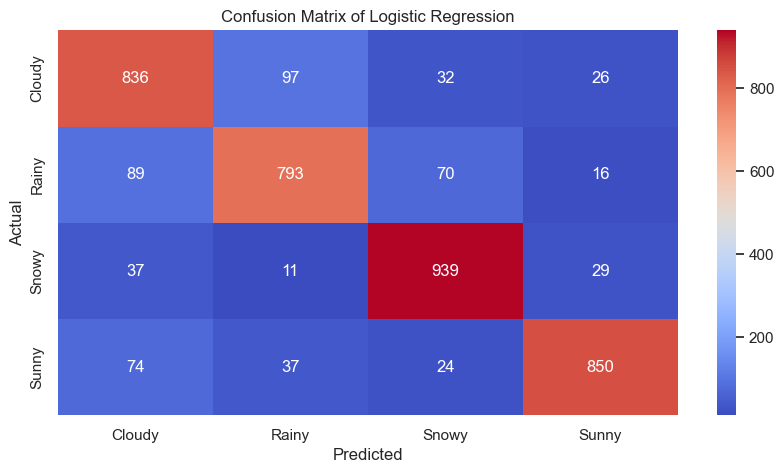

In [41]:
# Confusion Matrix using chart

cm_lr =confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(10,5))
sns.heatmap(cm_lr, annot=True, cmap='coolwarm', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_ )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()





#### Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems.
    Beyes theorem is used to calculate the probability of a class label given a set of features. It is assumed that each feature is independent of the other features. 
    hence the name Naive Bayes.  Target variable is categorical and it has conditional probability with respect to the features.
    P(y|X) = P(X|y) * P(y) / P(X). Read it as P(Y given X) = P(X given Y) * P(Y) / P(X)
    P(y|X) = Posterior probability
    P(X|y) = Likelihood
    P(y) = Prior probability
    P(X) = Marginal likelihood

'''

In [42]:
# Naive Bayes 
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [43]:
X_train.columns

Index(['Temperature', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
       'Cloud Cover_clear', 'Cloud Cover_cloudy', 'Cloud Cover_overcast',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Location_coastal', 'Location_inland'],
      dtype='object')

In [44]:
# accuracy of the model
y_pred = gnb.predict(X_test)
print(f'accurance of Gaussian Naive Beyes is {round(accuracy_score(y_test, y_pred),3)}')

accurance of Gaussian Naive Beyes is 0.784


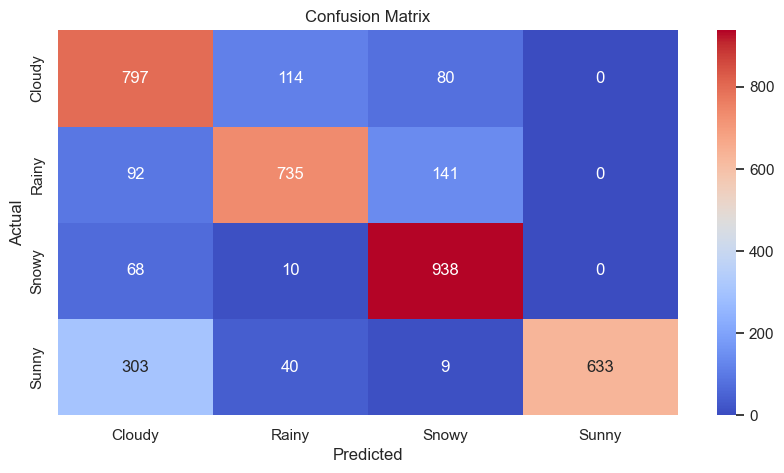

In [45]:
# plotting confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm_gnb, annot=True, cmap='coolwarm', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
predict_weather(X_test, gnb, le, y_test_inv, [i for i in range(10)])


,Actual,Predicted
0,Snowy,Snowy
1,Snowy,Snowy
2,Sunny,Sunny
3,Snowy,Snowy
4,Cloudy,Snowy
5,Rainy,Rainy
6,Sunny,Sunny
7,Snowy,Snowy
8,Rainy,Cloudy
9,Snowy,Snowy


### Multinomial Naive Bayes

In [47]:


''' Multinomial Naive Bayes is used when the features are discrete. It is used for text classification.
    It is based on the frequency of the words in the text. It is used when the features are categorical.
    It is used for text classification, spam filtering, sentiment analysis etc.
''' 

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
print(f'accuracy for Multinomial Naive Beyes is : {round(accuracy_score(y_test, y_pred),3)}')



accuracy for Multinomial Naive Beyes is : 0.745


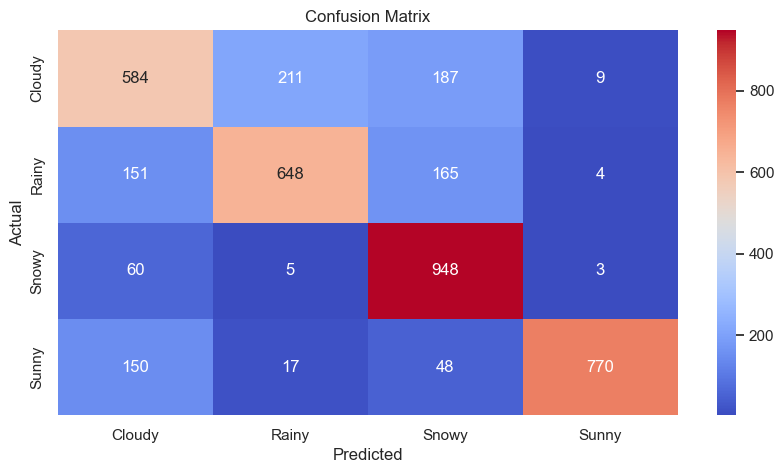

In [48]:
cm_mnb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm_mnb, annot=True, cmap='coolwarm', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# all the columns were selected in building the model. Lets use RFE to select the best features
rfe = RFE(logistic_model, n_features_to_select=10)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(max_iter=200, multi_class='multinomial'),
    n_features_to_select=10)

In [50]:
X_train_rfe =X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

In [51]:
# fit the model with the selected features. Use Multinomial Naive Bayes and Multinomial Logistic Regression

mnb.fit(X_train_rfe, y_train)
y_pred_rfe_mnb = mnb.predict(X_test_rfe)
print(f'accuracy for Multinomial Naive Beyes is : {round(accuracy_score(y_test, y_pred_rfe_mnb),3)}')

accuracy for Multinomial Naive Beyes is : 0.73


In [52]:
# Logistic Regression Multinomial
logistic_model.fit(X_train_rfe, y_train)
y_pred_rfe_lr = logistic_model.predict(X_test_rfe)
print(f'Accuracy of Logistic Regression:', round(accuracy_score(y_test, y_pred_rfe_lr),3))  


Accuracy of Logistic Regression: 0.86


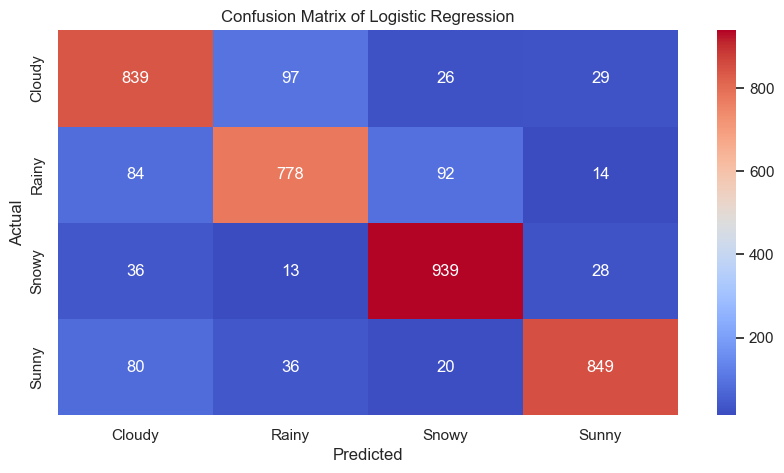

In [53]:
# Confusion Matrix using chart

cm_lr1 =confusion_matrix(y_test, y_pred_rfe_lr)

plt.figure(figsize=(10,5))
sns.heatmap(cm_lr1, annot=True, cmap='coolwarm', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_ )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


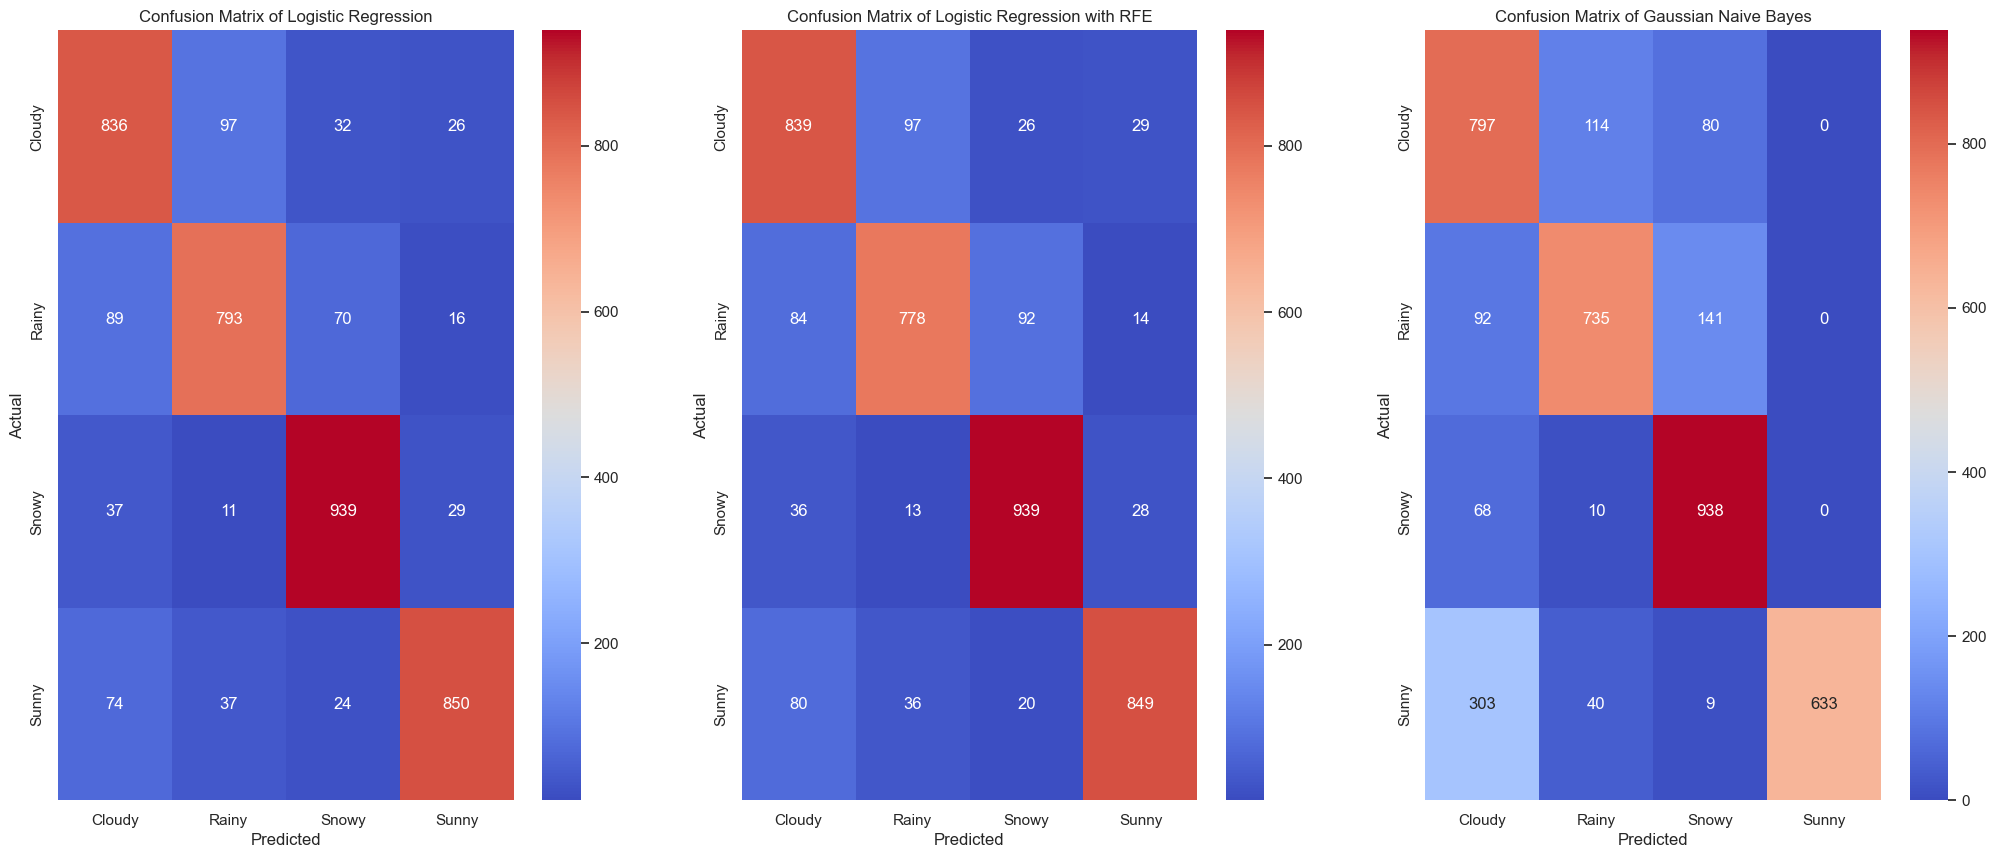

In [54]:
# Subplot of confusion matrix of Logistic Regression & Logistic Regression with RFE

plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.heatmap(cm_lr, annot=True, cmap='coolwarm', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')

plt.subplot(1,3,2)
sns.heatmap(cm_lr1, annot=True, cmap='coolwarm', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression with RFE')


plt.subplot(1,3,3)
sns.heatmap(cm_gnb, annot=True, cmap='coolwarm', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Gaussian Naive Bayes')


plt.show()

In [55]:
# find variance inflation factor to check multicollinearity


vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif



,Features,VIF
0,Temperature,10.291825
1,Wind Speed,3.981608
2,Precipitation (%),5.872258
3,Atmospheric Pressure,15.897916
4,UV Index,3.167532
5,Visibility (km),4.843126
6,Cloud Cover_clear,1.915211
7,Cloud Cover_cloudy,1.199783
8,Cloud Cover_overcast,2.569174
9,Season_Winter,2.052269


In [56]:
# drop Atmospheric Pressure column as it has high VIF value

X_train_rfe.drop('Atmospheric Pressure', axis=1, inplace=True)
X_test_rfe.drop('Atmospheric Pressure', axis=1, inplace=True)

In [57]:
logistic_model.fit(X_train_rfe, y_train)
y_pred_rfe_lr1 = logistic_model.predict(X_test_rfe)
print(f'Accuracy of Logistic Regression:', round(accuracy_score(y_test, y_pred_rfe_lr1),3))


Accuracy of Logistic Regression: 0.86


In [58]:
#Confusion Matrix using chart
cm_lr2 =confusion_matrix(y_test, y_pred_rfe_lr1)


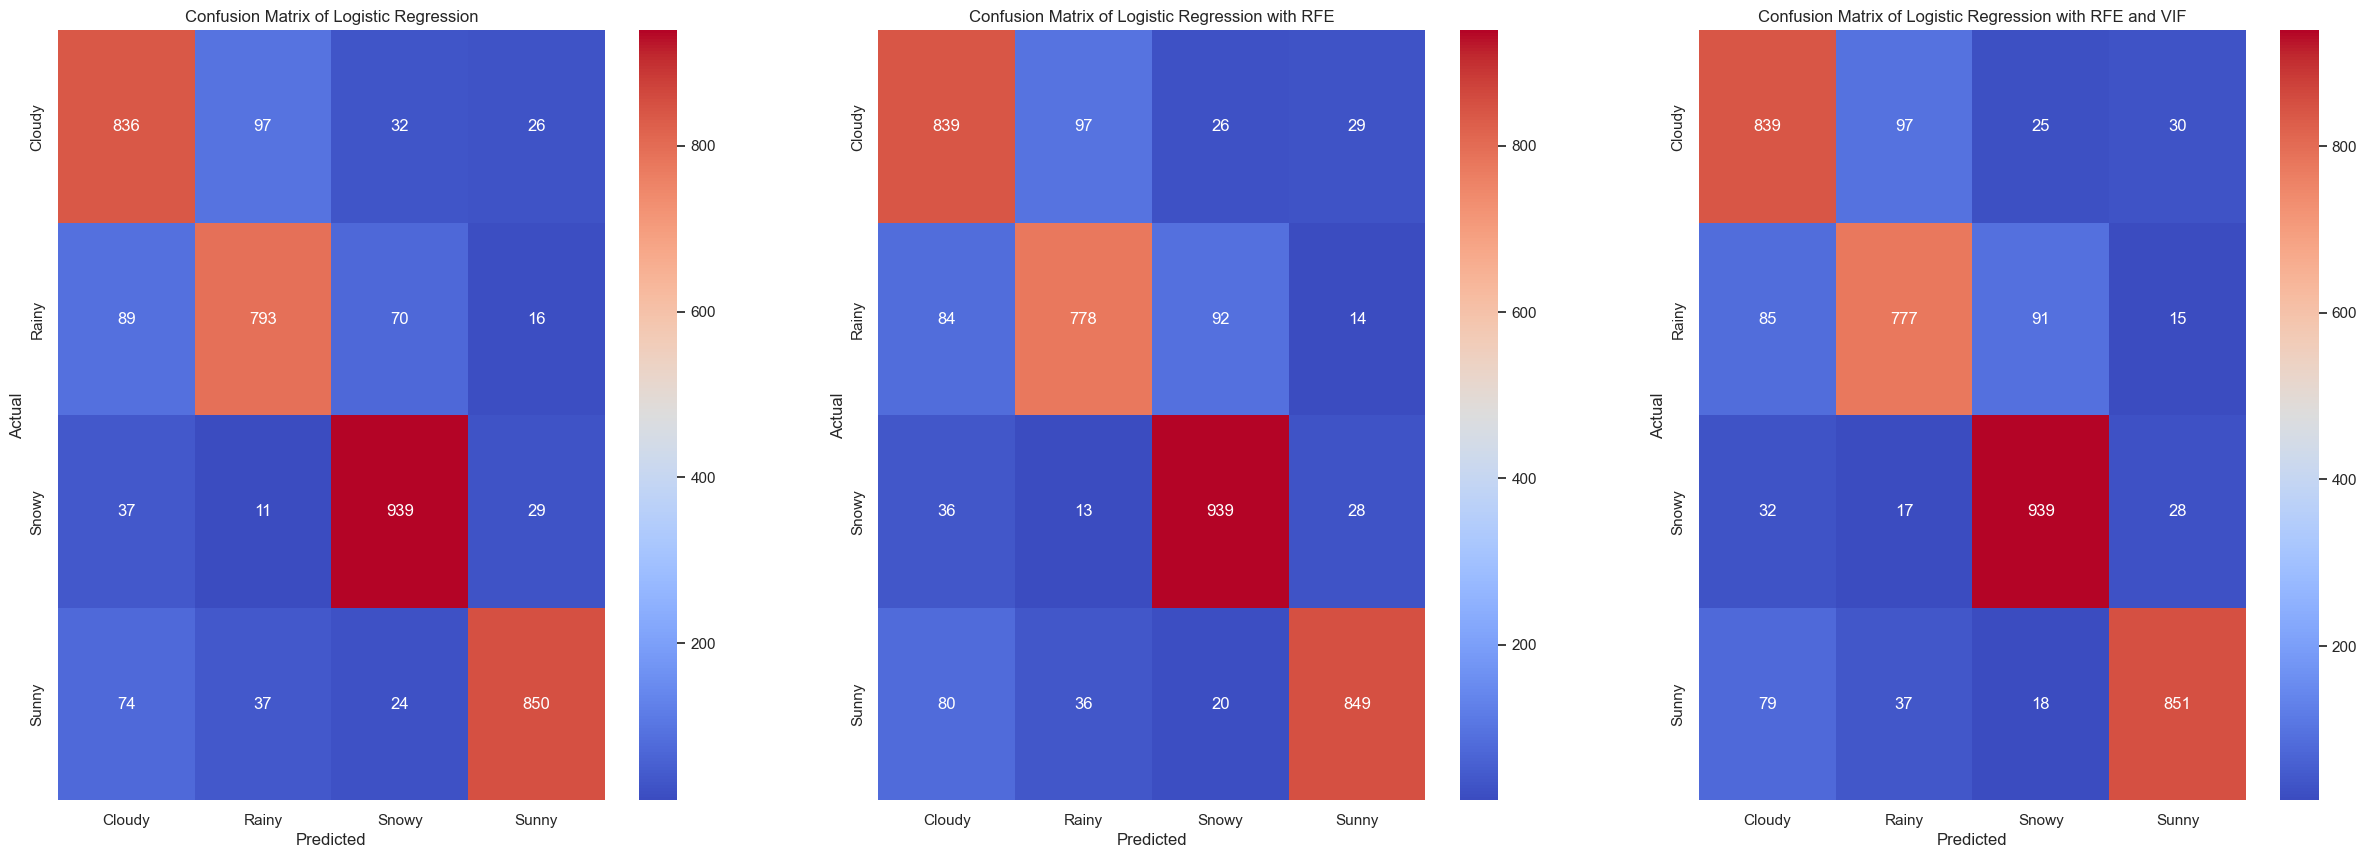

In [59]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.heatmap(cm_lr, annot=True, cmap='coolwarm', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')

plt.subplot(1,3,2)
sns.heatmap(cm_lr1, annot=True, cmap='coolwarm', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression with RFE')

plt.subplot(1,3,3)
sns.heatmap(cm_lr2, annot=True, cmap='coolwarm', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression with RFE and VIF')


plt.show()

In [61]:
# print the actual and predicted values of the first 10 rows

predict_weather(X_test_rfe, logistic_model, le, y_test_inv, [i for i in range(10)])

,Actual,Predicted
0,Snowy,Snowy
1,Snowy,Snowy
2,Sunny,Sunny
3,Snowy,Snowy
4,Cloudy,Cloudy
5,Rainy,Rainy
6,Sunny,Sunny
7,Snowy,Snowy
8,Rainy,Snowy
9,Snowy,Snowy


#### Important Learnings

- In Classficiation, Convert categorical values to Numerical ones. for converting Feature categorical values use One Hot encoding. for Converting Y Categorical Values, Use Label Encoder.
- Scaling of Feature variables is important. I have used Min Max Scaler here to bring all values between 0 and 1. No need to Scale, target variable which is already encoded using label encoder
- Explored multiple models, Logistic Regression, Naive Beyes - Multinominal Naive Beyes & Gaussian NB.
- Used Automated Feature Elimation to reduce Covariance. 
- Capturing True Postive, TN, FP, FN is difficult in Multiclass. Use TP value only using Confusion Matrix